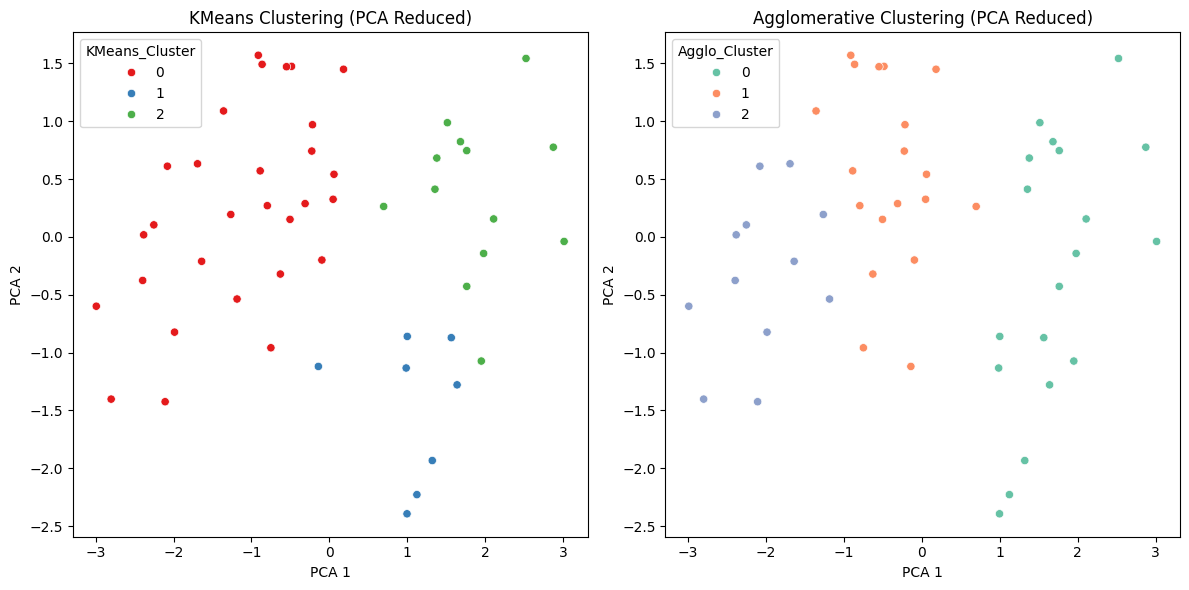


Cluster Assignments:
          Location  KMeans_Cluster  Agglo_Cluster  DBSCAN_Cluster
0          Alabama               1              0               0
1           Alaska               2              0              -1
2          Arizona               2              0               0
3         Arkansas               1              1               0
4       California               2              0               0
5         Colorado               2              0               0
6      Connecticut               0              1               0
7         Delaware               0              1               0
8          Florida               2              0               0
9          Georgia               1              0               0
10          Hawaii               0              1               0
11           Idaho               0              2               0
12        Illinois               2              0               0
13         Indiana               0              1     

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('Cleaned_Dataset.csv')

# Select features
features = ['Murder', 'Assault', 'UrbanPop', 'Rape']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 1. KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# -------------------------------
# 2. Agglomerative (Hierarchical) Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# -------------------------------
# 3. DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=3)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# -------------------------------
# 4. PCA for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12, 6))

# KMeans Clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['KMeans_Cluster'], palette='Set1')
plt.title('KMeans Clustering (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Agglomerative Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Agglo_Cluster'], palette='Set2')
plt.title('Agglomerative Clustering (PCA Reduced)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()

# -------------------------------
# 5. Final Output
print("\nCluster Assignments:")
print(df[['Location', 'KMeans_Cluster', 'Agglo_Cluster', 'DBSCAN_Cluster']])


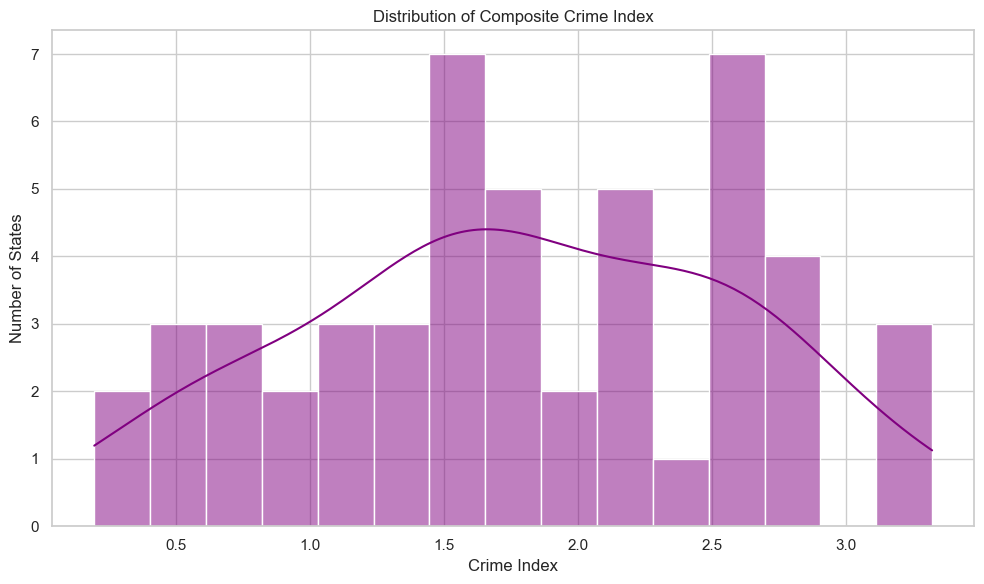

Top 5 states by Crime Index:
      Location  Crime_Index
8      Florida     3.321887
27      Nevada     3.226160
4   California     3.145537
21    Michigan     2.830112
30  New Mexico     2.745367
Bottom 5 states by Crime Index:
         Location  Crime_Index
44        Vermont     0.195387
33   North Dakota     0.203390
18          Maine     0.543404
28  New Hampshire     0.583036
47  West Virginia     0.588792


In [7]:

df = pd.read_csv('Cleaned_Dataset.csv')

features = ['Murder', 'Assault', 'UrbanPop', 'Rape']


for col in features:
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


crime_index_cols = [col + '_norm' for col in features]
df['Crime_Index'] = df[crime_index_cols].sum(axis=1)

top5 = df.sort_values('Crime_Index', ascending=False).head()
bottom5 = df.sort_values('Crime_Index', ascending=True).head()

plt.figure(figsize=(10, 6))
sns.histplot(df['Crime_Index'], bins=15, kde=True, color='purple')
plt.title('Distribution of Composite Crime Index')
plt.xlabel('Crime Index')
plt.ylabel('Number of States')
plt.tight_layout()
plt.show()

print('Top 5 states by Crime Index:')
print(top5[['Location', 'Crime_Index']])
print('Bottom 5 states by Crime Index:')
print(bottom5[['Location', 'Crime_Index']])

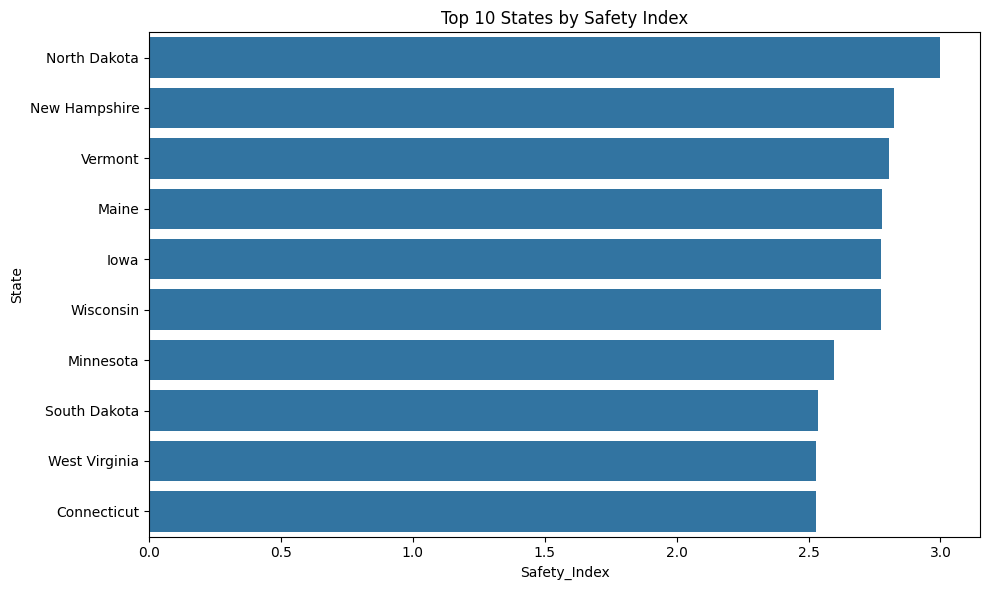

Top 5 Safest States:
            State  Safety_Index
33   North Dakota      3.000000
28  New Hampshire      2.823743
44        Vermont      2.804613
18          Maine      2.778630
14           Iowa      2.774632
Bottom 5 States (Need Most Improvement):
         State  Safety_Index
21    Michigan      0.881753
4   California      0.854463
1       Alaska      0.737967
27      Nevada      0.604349
8      Florida      0.491672


In [ ]:
df['State'] = df['Unnamed: 0']

features = ['Murder', 'Assault', 'Rape']
for col in features:
    df[col + '_norm'] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

df['Safety_Index'] = 3 - (df['Murder_norm'] + df['Assault_norm'] + df['Rape_norm'])

result = df[['State', 'Safety_Index']].sort_values('Safety_Index', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=result.head(10), x='Safety_Index', y='State')
plt.title('Top 10 States by Safety Index')
plt.tight_layout()
plt.show()

print("\
Top 5 Safest States:")
print(result.head())
print("\
Bottom 5 States (Need Most Improvement):")
print(result.tail())

                    Mean R2    Std R2
KNN                0.535295  0.233643
Random Forest      0.514954  0.242073
Lasso              0.498541  0.220690
Ridge              0.471922  0.255859
Linear Regression  0.471860  0.255910
SVR                0.415781  0.219290
Decision Tree      0.328097  0.226634


C:\Users\sudhe\AppData\Local\Temp\ipykernel_9112\4068316079.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df['Mean R2'], palette='viridis')


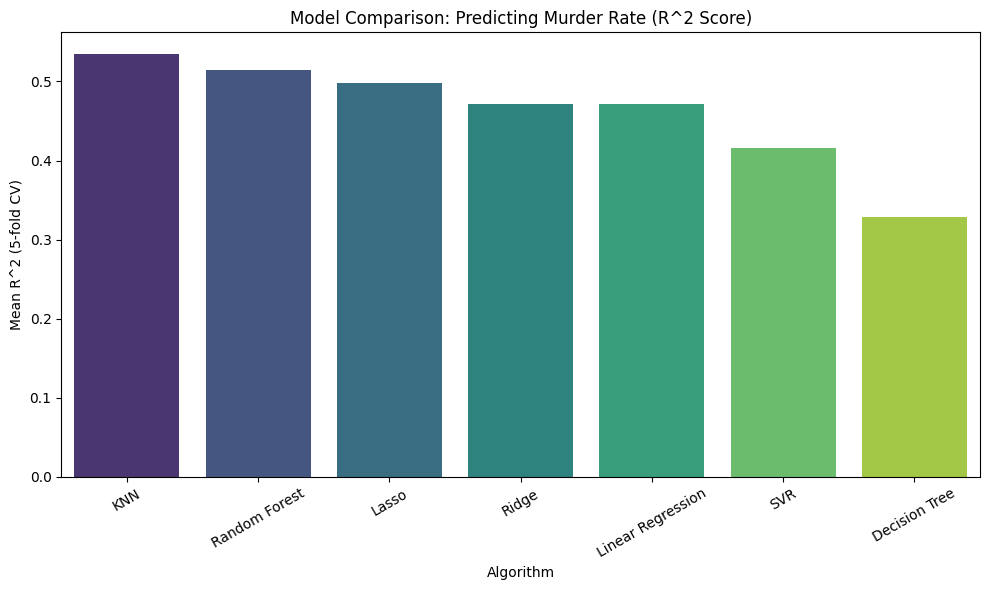

Best model for predicting Murder rate: KNN


In [8]:


from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import numpy as np

y = df['Murder']
X = df[['Assault', 'UrbanPop', 'Rape']]

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(),
    'SVR': SVR()
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    results[name] = [np.mean(scores), np.std(scores)]

results_df = pd.DataFrame(results, index=['Mean R2', 'Std R2']).T.sort_values('Mean R2', ascending=False)

print(results_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y=results_df['Mean R2'], palette='viridis')
plt.title('Model Comparison: Predicting Murder Rate (R^2 Score)')
plt.ylabel('Mean R^2 (5-fold CV)')
plt.xlabel('Algorithm')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

best_model = results_df.index[0]
print('Best model for predicting Murder rate:', best_model)

In [12]:
regions = {
    'Northeast': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'],
    'Midwest': ['Ohio', 'Indiana', 'Illinois', 'Michigan', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas'],
    'South': ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Mississippi', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'Washington', 'Oregon', 'California', 'Alaska', 'Hawaii']
}
df = df.rename(columns={'Unnamed: 0': 'State'})

def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'

df['Region'] = df['State'].apply(get_region)

print(df.head())

        State  Murder  Assault  UrbanPop  Rape Region
0     Alabama    13.2      236        58  21.2  South
1      Alaska    10.0      263        48  44.5   West
2     Arizona     8.1      294        80  31.0   West
3    Arkansas     8.8      190        50  19.5  South
4  California     9.0      276        91  40.6   West


              Murder     Assault       Rape  CompositeCrimeIndex
Region                                                          
Midwest     5.700000  120.333333  18.441667             0.841070
Northeast   4.700000  126.666667  13.777778             0.682005
South      11.706250  220.000000  21.162500             1.614522
West        7.030769  187.230769  29.053846             1.424554


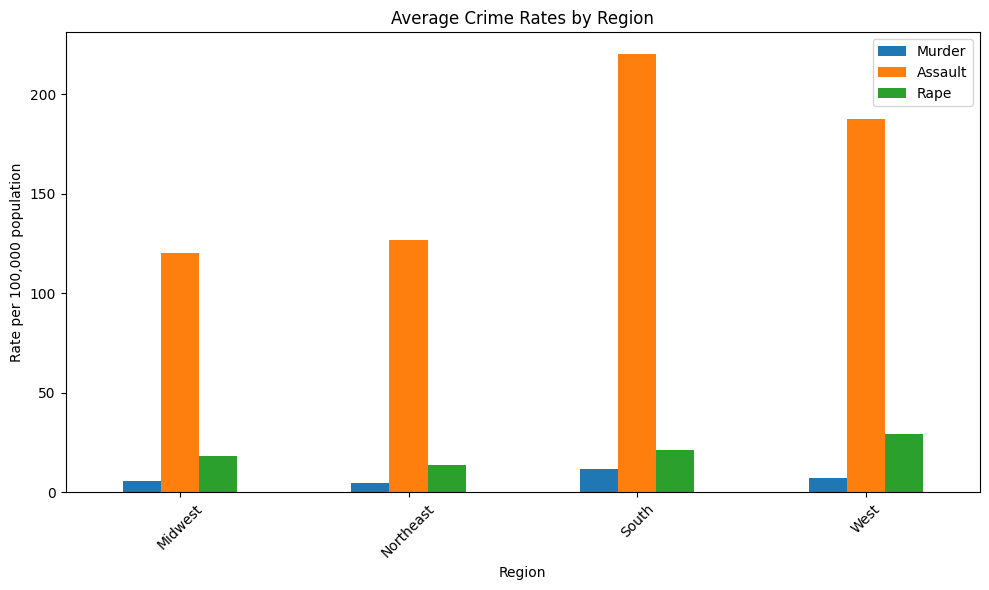

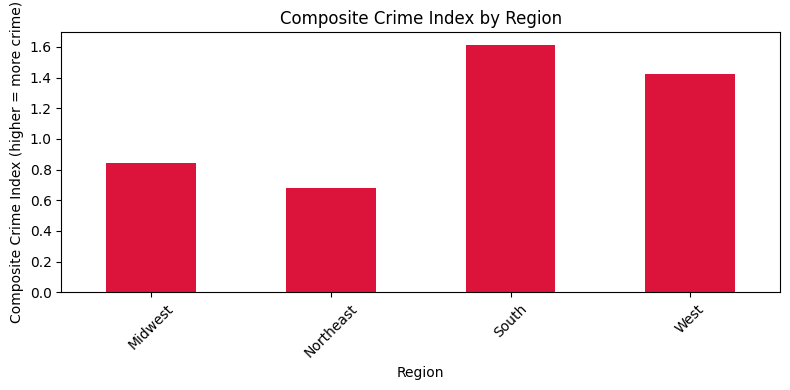

Regional crime averages and composite index shown above.


In [ ]:
regional_means = df.groupby('Region')[['Murder', 'Assault', 'Rape']].mean()

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
crime_norm = scaler.fit_transform(df[['Murder', 'Assault', 'Rape']])
df['CrimeIndex'] = crime_norm.sum(axis=1)
regional_index = df.groupby('Region')['CrimeIndex'].mean()

display_df = regional_means.copy()
display_df['CompositeCrimeIndex'] = regional_index
print(display_df)

# Visualize
plt.figure(figsize=(10,6))
display_df[['Murder', 'Assault', 'Rape']].plot(kind='bar', stacked=False, ax=plt.gca())
plt.title('Average Crime Rates by Region')
plt.ylabel('Rate per 100,000 population')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
display_df['CompositeCrimeIndex'].plot(kind='bar', color='crimson')
plt.title('Composite Crime Index by Region')
plt.ylabel('Composite Crime Index (higher = more crime)')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



              Q1      Q3    IQR Lower Bound Upper Bound Num Outliers
Murder     4.075   11.25  7.175     -6.6875     22.0125            0
Assault    109.0   249.0  140.0      -101.0       459.0            0
Rape      15.075  26.175   11.1      -1.575      42.825            2
UrbanPop    54.5   77.75  23.25      19.625     112.625            0
Outlier states for Murder : []
Outlier states for Assault : []
Outlier states for Rape : ['Alaska', 'Nevada']
Outlier states for UrbanPop : []


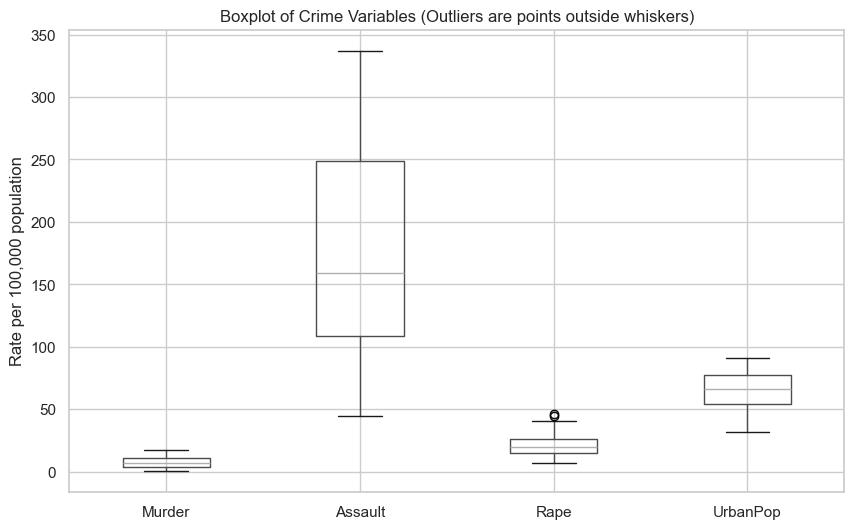

In [ ]:
import numpy as np

crime_vars = ['Murder', 'Assault', 'Rape','UrbanPop']
outlier_info = {}

for var in crime_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outlier_info[var] = {
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Num Outliers': outliers.shape[0],
        'Outlier States': outliers['Location'].tolist()
    }

import pandas as pd
summary = pd.DataFrame(outlier_info).T[['Q1','Q3','IQR','Lower Bound','Upper Bound','Num Outliers']]
print(summary)

for var in crime_vars:
    print('Outlier states for', var, ':', outlier_info[var]['Outlier States'])

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df[crime_vars].boxplot()
plt.title('Boxplot of Crime Variables (Outliers are points outside whiskers)')
plt.ylabel('Rate per 100,000 population')
plt.show()

Outliers in Murder (|z-score| > 2):
  Location  Murder
9  Georgia    17.4
Outliers in Assault (|z-score| > 2):
          Location  Assault
32  North Carolina      337
Outliers in Rape (|z-score| > 2):
      Location  Rape
1       Alaska  44.5
4   California  40.6
27      Nevada  46.0


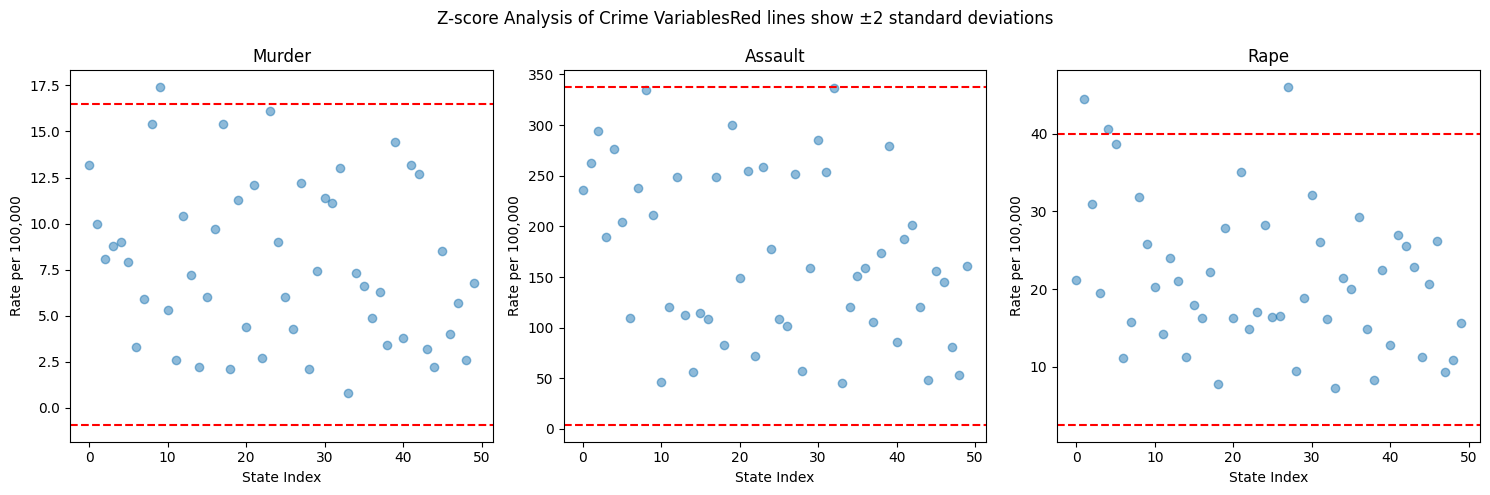

Percentage of outliers in each variable:
Murder: 2.0%
Assault: 2.0%
Rape: 6.0%


In [31]:
from scipy import stats
import numpy as np

crime_vars = ['Murder', 'Assault', 'Rape']
z_scores = {}
outliers_z = {}
threshold = 2  

for var in crime_vars:
    z = np.abs(stats.zscore(df[var]))
    z_scores[var] = z
    outliers_z[var] = df[z > threshold][['Location', var]]

for var in crime_vars:
    print(f'\
Outliers in {var} (|z-score| > {threshold}):')
    print(outliers_z[var])

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Z-score Analysis of Crime Variables\
Red lines show ±2 standard deviations')

for i, var in enumerate(crime_vars):
    axes[i].scatter(range(len(df)), df[var], alpha=0.5)
    axes[i].axhline(y=df[var].mean() + threshold*df[var].std(), color='r', linestyle='--')
    axes[i].axhline(y=df[var].mean() - threshold*df[var].std(), color='r', linestyle='--')
    axes[i].set_title(var)
    axes[i].set_xlabel('State Index')
    axes[i].set_ylabel('Rate per 100,000')

plt.tight_layout()
plt.show()

outlier_percentages = {var: (len(outliers_z[var])/len(df))*100 for var in crime_vars}
print('\
Percentage of outliers in each variable:')
for var, pct in outlier_percentages.items():
    print(f'{var}: {pct:.1f}%')

<Axes: xlabel='Rape', ylabel='Density'>

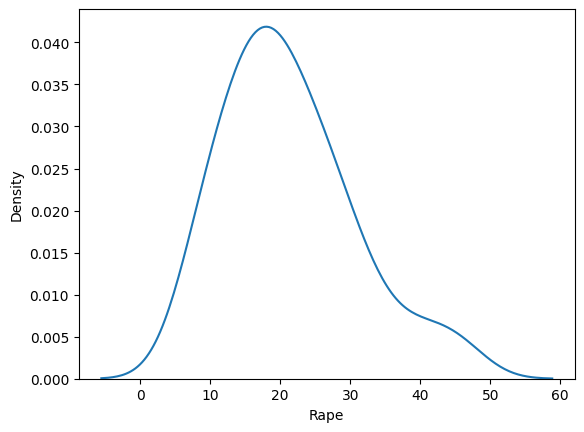

In [28]:
sns.kdeplot(df["Rape"])

<Axes: xlabel='Murder', ylabel='Density'>

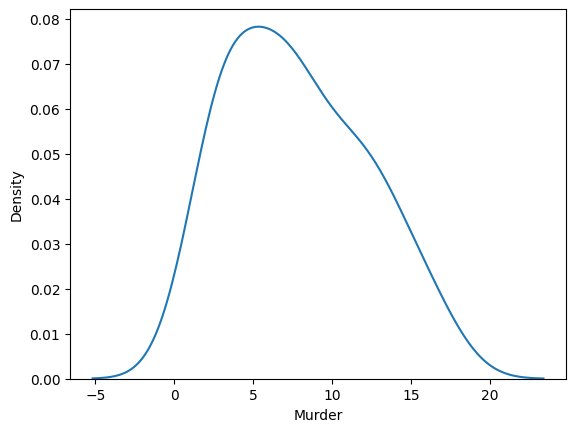

In [29]:
sns.kdeplot(df["Murder"])

<Axes: xlabel='Assault', ylabel='Density'>

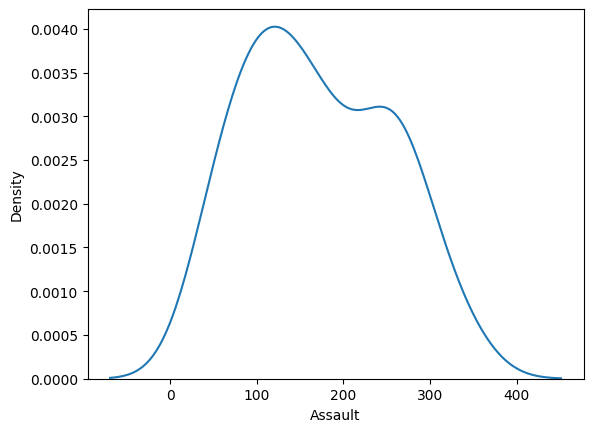

In [30]:
sns.kdeplot(df["Assault"])

In [3]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

# Load data
df = pd.read_csv('Cleaned_Dataset.csv')

# Geocoder setup
geolocator = Nominatim(user_agent="geo_crime_map")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Get coordinates
df['location_full'] = df['Location'] + ", USA"
df['geo'] = df['location_full'].apply(geocode)
df['Latitude'] = df['geo'].apply(lambda loc: loc.latitude if loc else None)
df['Longitude'] = df['geo'].apply(lambda loc: loc.longitude if loc else None)

# Classify geography based on state name (example logic)
coastal_states = ['California', 'Florida', 'New York', 'Texas', 'Washington', 'Oregon', 'Massachusetts', 'Maryland', 'Virginia', 'Georgia']
hilly_states = ['Colorado', 'Montana', 'Utah', 'Nevada', 'Vermont', 'New Hampshire']
flat_states = ['Illinois', 'Iowa', 'Kansas', 'Nebraska', 'Oklahoma']

def classify_geography(location):
    for state in coastal_states:
        if state in location:
            return 'Coastal'
    for state in hilly_states:
        if state in location:
            return 'Hilly'
    for state in flat_states:
        if state in location:
            return 'Flatland'
    return 'Interior'

df['Geography'] = df['location_full'].apply(classify_geography)

# Create map
m = folium.Map(location=[39.8283, -98.5795], zoom_start=4, tiles='CartoDB positron')
marker_cluster = MarkerCluster().add_to(m)

# Color based on geography
color_dict = {
    'Coastal': 'blue',
    'Hilly': 'green',
    'Flatland': 'orange',
    'Interior': 'purple'
}

# Add points
for idx, row in df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        popup_html = folium.Popup(
            f"<b>{row['Location']}</b><br>"
            f"<b>Geography:</b> {row['Geography']}<br>"
            f"<b>Murder:</b> {row['Murder']}<br>"
            f"<b>Assault:</b> {row['Assault']}<br>"
            f"<b>UrbanPop:</b> {row['UrbanPop']}<br>"
            f"<b>Rape:</b> {row['Rape']}",
            max_width=300
        )
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=5 + row['Murder'] * 0.5,
            color=color_dict.get(row['Geography'], 'gray'),
            fill=True,
            fill_color=color_dict.get(row['Geography'], 'gray'),
            fill_opacity=0.8,
            popup=popup_html
        ).add_to(marker_cluster)

m


C:\Users\sudhe\AppData\Local\Temp\ipykernel_8372\3729947702.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_group.index, y=geo_group['Murder'], palette="Blues", ax=axes[0,0])
C:\Users\sudhe\AppData\Local\Temp\ipykernel_8372\3729947702.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_group.index, y=geo_group['Assault'], palette="Oranges", ax=axes[0,1])
C:\Users\sudhe\AppData\Local\Temp\ipykernel_8372\3729947702.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=geo_group.index, y=geo_group['UrbanPop'], palette="Greens

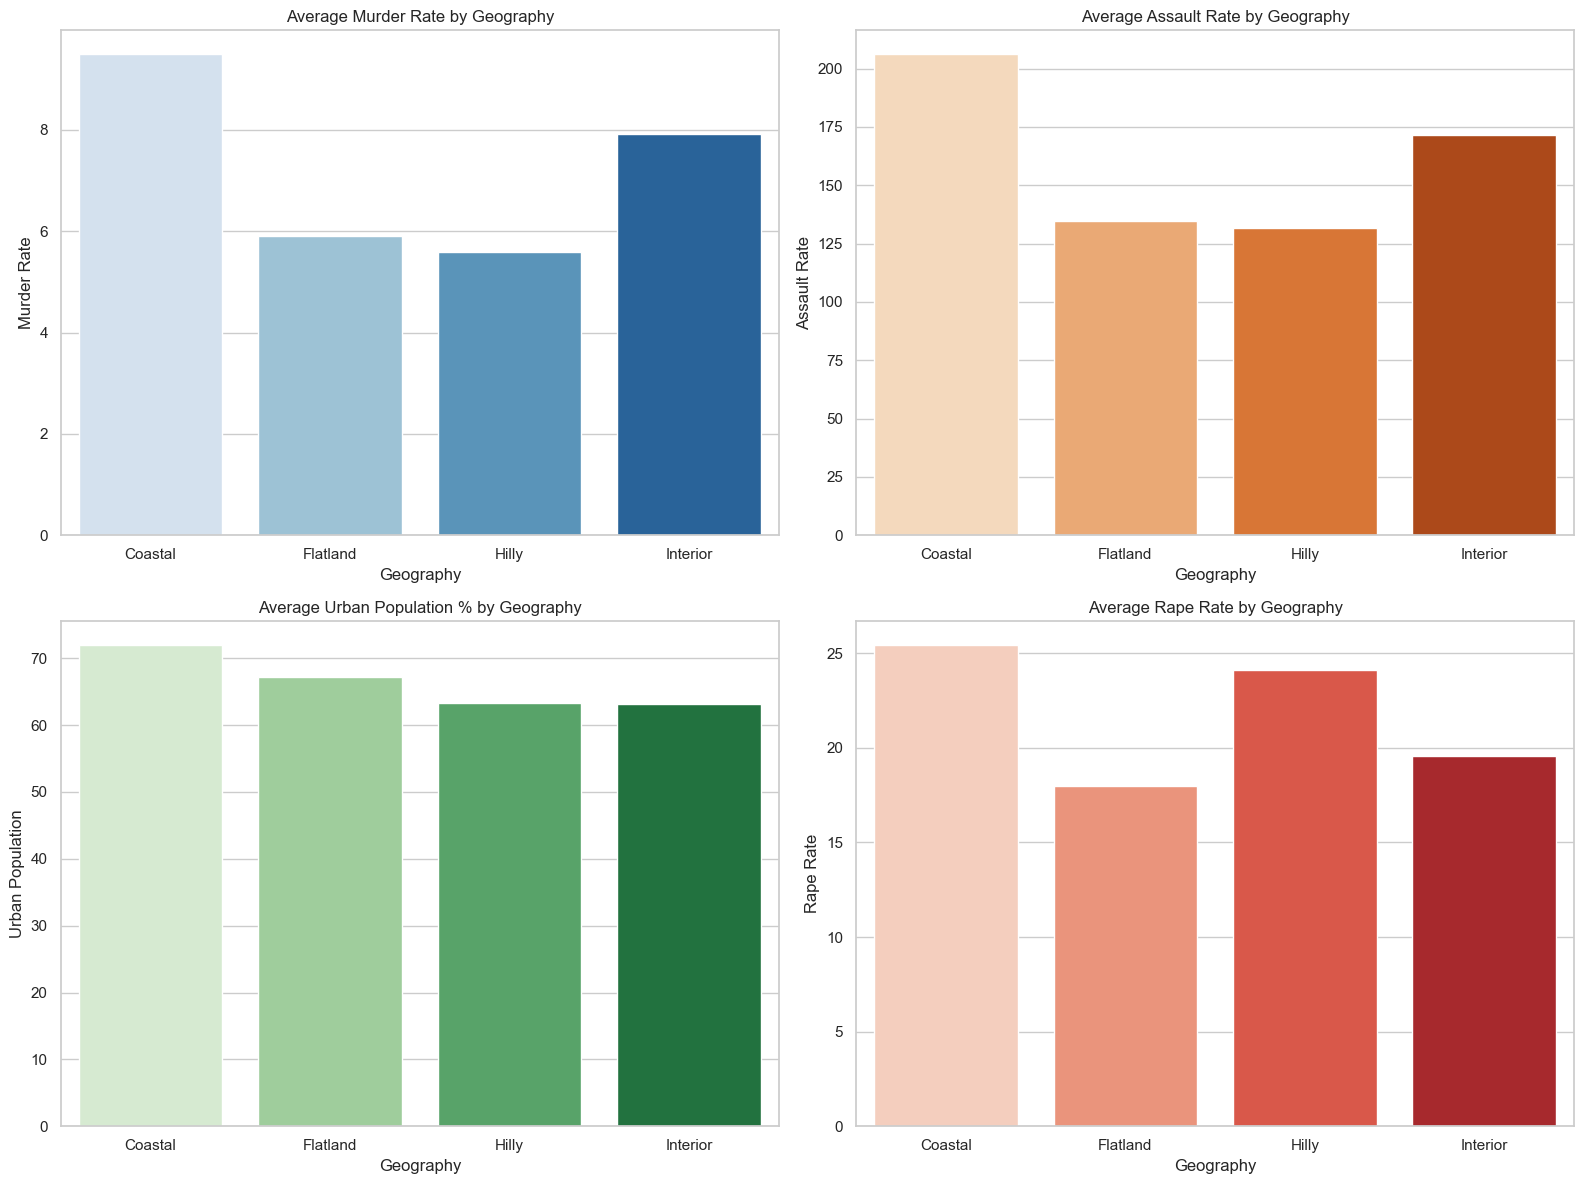

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Cleaned_Dataset.csv')

coastal_states = ['California', 'Florida', 'New York', 'Texas', 'Washington', 'Oregon', 'Massachusetts', 'Maryland', 'Virginia', 'Georgia']
hilly_states = ['Colorado', 'Montana', 'Utah', 'Nevada', 'Vermont', 'New Hampshire']
flat_states = ['Illinois', 'Iowa', 'Kansas', 'Nebraska', 'Oklahoma']

def classify_geography(location):
    for state in coastal_states:
        if state in location:
            return 'Coastal'
    for state in hilly_states:
        if state in location:
            return 'Hilly'
    for state in flat_states:
        if state in location:
            return 'Flatland'
    return 'Interior'

df['location_full'] = df['Location'] + ", USA"
df['Geography'] = df['location_full'].apply(classify_geography)

geo_group = df.groupby('Geography').mean(numeric_only=True)

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Murder
sns.barplot(x=geo_group.index, y=geo_group['Murder'], palette="Blues", ax=axes[0,0])
axes[0,0].set_title('Average Murder Rate by Geography')
axes[0,0].set_ylabel('Murder Rate')

# Assault
sns.barplot(x=geo_group.index, y=geo_group['Assault'], palette="Oranges", ax=axes[0,1])
axes[0,1].set_title('Average Assault Rate by Geography')
axes[0,1].set_ylabel('Assault Rate')

# UrbanPop
sns.barplot(x=geo_group.index, y=geo_group['UrbanPop'], palette="Greens", ax=axes[1,0])
axes[1,0].set_title('Average Urban Population % by Geography')
axes[1,0].set_ylabel('Urban Population')

# Rape
sns.barplot(x=geo_group.index, y=geo_group['Rape'], palette="Reds", ax=axes[1,1])
axes[1,1].set_title('Average Rape Rate by Geography')
axes[1,1].set_ylabel('Rape Rate')

plt.tight_layout()
plt.show()
